<a href="https://colab.research.google.com/github/gokulj45/Linear-Regression/blob/main/Linear_Regression_for_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression on - Computer Hardware Performance dataset**

Note: Prepared with Google Colab, best rendered when opened with Colab

##Importing Libraries and Datasets

In [14]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from math import sqrt
from IPython.display import display

#Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

> ## The data set is taken from - [Data set](https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/)

##1 - Data Visualization and Exploration

In [17]:
#Creating a list with attribute names
feature_list: list = ['Vendor_name','Model_name','Machine_cycle_time', 'Min_main_mem', 'Max_main_mem', 'Cache_mem', 'Min_channels', 'Max_channels', 'Published_performance', 'Estimated_performance' ];
#Reading the dataset and storing it to a pandas dataframe
data_df: object = pd.read_csv('https://raw.githubusercontent.com/gokulj45/Linear-Regression/main/machine.data', names=feature_list)
#data_df: object = pd.read_csv('machine.data', names=feature_list)
#Printing first two records for sanity check
display(data_df.head(5))


,Vendor_name,Model_name,Machine_cycle_time,Min_main_mem,Max_main_mem,Cache_mem,Min_channels,Max_channels,Published_performance,Estimated_performance
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


###Statistical Measures

In [16]:
#Number of Instances = 209
#Number of Attributes = 10
display(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Vendor_name            209 non-null    object
 1   Model_name             209 non-null    object
 2   Machine_cycle_time     209 non-null    int64 
 3   Min_main_mem           209 non-null    int64 
 4   Max_main_mem           209 non-null    int64 
 5   Cache_mem              209 non-null    int64 
 6   Min_channels           209 non-null    int64 
 7   Max_channels           209 non-null    int64 
 8   Published_performance  209 non-null    int64 
 9   Estimated_performance  209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


None

In [15]:
#Descriptive statistical measures of the data
display(data_df.describe())

,Machine_cycle_time,Min_main_mem,Max_main_mem,Cache_mem,Min_channels,Max_channels,Published_performance,Estimated_performance
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


### Null Value and Missing value Analysis

In [18]:
# Checking for null values in all attributes
display(data_df.isnull().sum())

Vendor_name              0
Model_name               0
Machine_cycle_time       0
Min_main_mem             0
Max_main_mem             0
Cache_mem                0
Min_channels             0
Max_channels             0
Published_performance    0
Estimated_performance    0
dtype: int64

In [ ]:
# Checking for Duplicate values in all attributes
print("No of Duplicate values : ",data_df.duplicated().sum())

No of Duplicate values :  0


There are no Null values and Missing values present and hence no explicit handling is required for the same.

###Data Distribution - Class Imbalance Analysis

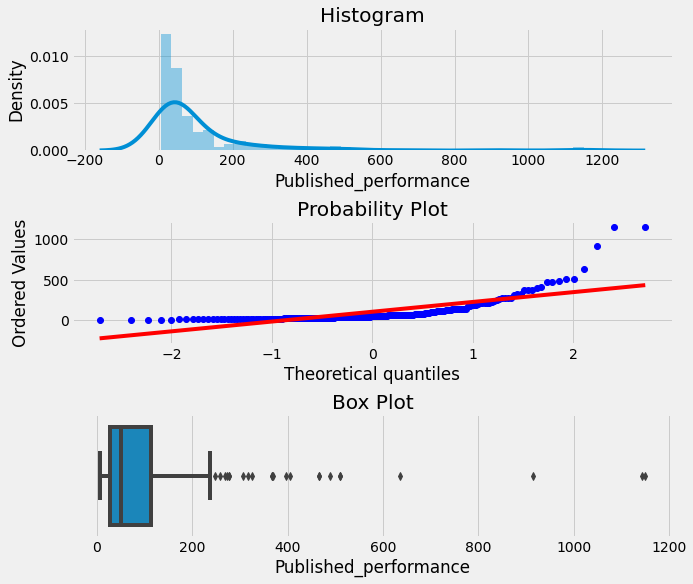

In [ ]:
# Custom function to plot histogram, qq and box plot
def three_chart_plot(data_frame, feature):

    style.use('fivethirtyeight')

    # Creating a customized chart. and giving in figsize and other params. 
    plt_img = plt.figure(constrained_layout=True, figsize=(12,8))
    # Creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=plt_img)

    # Customizing the histogram grid. 
    hist = plt_img.add_subplot(grid[0, :2])
    # Assigning title 
    hist.set_title('Histogram')
    # plotting the histogram. 
    sns.distplot(data_frame.loc[:,feature], norm_hist=True, ax = hist)

    # customizing the QQ_plot. 
    qq_plt = plt_img.add_subplot(grid[1, :2])
    # Assigning title
    qq_plt.set_title('QQ_plot')
    # Plotting the QQ_Plot. 
    stats.probplot(data_frame.loc[:,feature], plot = qq_plt)

    # Customizing the Box Plot. 
    box_plt = plt_img.add_subplot(grid[2, :2])
    # Assigning title 
    box_plt.set_title('Box Plot')
    # Plotting the box plot. 
    sns.boxplot(data_frame.loc[:,feature], orient="v", ax = box_plt );

# Plotting the 3 plots for target variable    
three_chart_plot(data_df, 'Published_performance')

In [ ]:
print("Skewness: " + str(data_df['Published_performance'].skew()))

Skewness: 3.892814292345451


From the above 3 plots we can say that,

* Our target variable, Published_performance is not normally distributed. It is left-skewed. 
*   14.83 % of data falls in 0-20 range
*   57.89 % of data falls in 21-100 range
*   So 0-100 range holds 72.72 % of values
*   12.91 % of data falls in 101-200 range
*   S0 0-200 range holds 85.64 % of values
*   6.22 % of data falls in 201-300 range
*   Rest 8.13 % of data falls above 300 +

* From the box plot we may say there are many potential outliers. We have concluded on this with our justification by futher analysis in the Observation segment













### Correlation Analaysis

In [ ]:
#Using only 6 predictive attributes and goal attribute for correlation analysis
# Dropping vendor name, model name and estimated performance attribute
input = data_df.drop(columns=['Vendor_name', 'Model_name', 'Estimated_performance'])
input.columns
correlation_matrix: object = input.corr()
correlation_matrix

,Machine_cycle_time,Min_main_mem,Max_main_mem,Cache_mem,Min_channels,Max_channels,Published_performance
Machine_cycle_time,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099
Min_main_mem,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931
Max_main_mem,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004
Cache_mem,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641
Min_channels,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903
Max_channels,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209
Published_performance,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000


From the last row of the above table we can get the correlation of all the features with target variable.



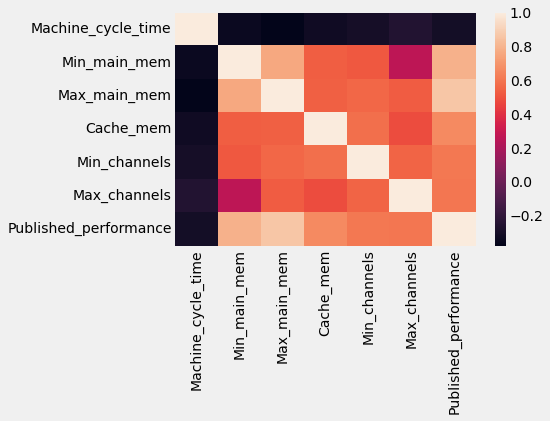

In [ ]:
# visualize using heat map
sns.heatmap(correlation_matrix)

*   Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of those.
*  Since we don't have any two predictors with correlation >= 0.8, we have kept all 6 of them.

### Performing a scatter plot of predictive attributes with target variable

#### Published_performance Vs Max_main_mem

We are first choosing these two attributes since they have a high correlation of 0.863004

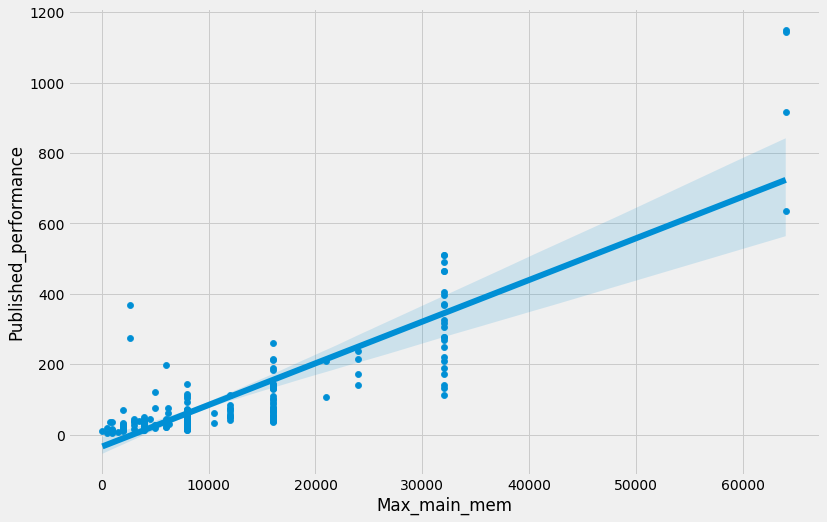

In [ ]:
def customized_scatterplot(y, x):
    # Fixing the plot size. 
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    # Plotting the target with predictor
    sns.scatterplot(y = y, x = x)
    sns.regplot(y = y, x = x)
# Plotting Published performance (target) with Maximum main memory (predictor)
customized_scatterplot(input['Published_performance'], input['Max_main_mem'])

Plotting a residual plot for the same features

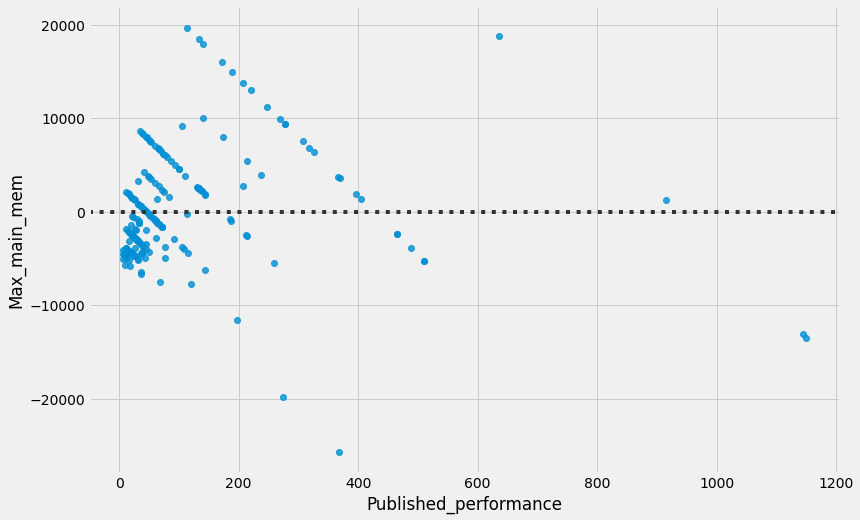

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(input['Published_performance'], input['Max_main_mem'])

#### Published_performance Vs Min_main_mem

Next we choose these two attributes since they have the second highest correlation of 0.794931

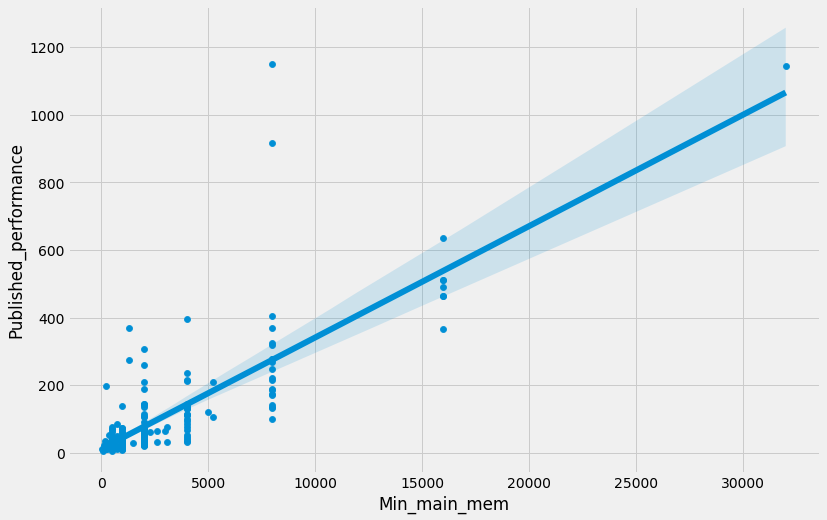

In [ ]:
# Plotting Published performance (target) with Minimum main memory (predictor)
customized_scatterplot(input['Published_performance'], input['Min_main_mem'])

Plotting a residual plot for the same features

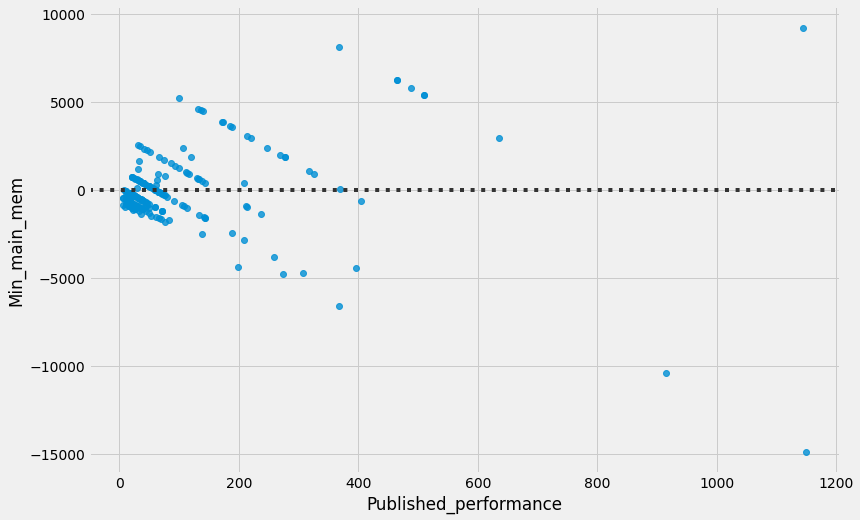

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(input['Published_performance'], input['Min_main_mem'])

#### Published_performance Vs Cache_mem
Plotting these two attributes since they have a high correlation of 0.662641

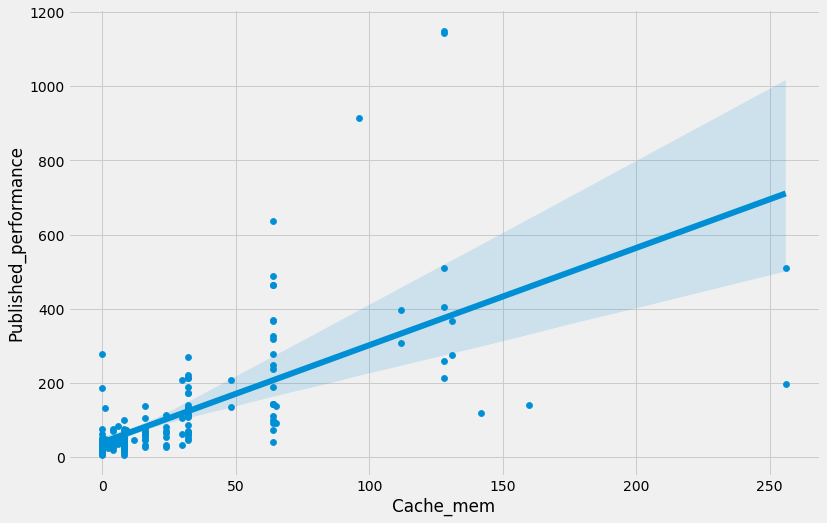

In [ ]:
# Plotting Published performance (target) with Cache memory (predictor)
customized_scatterplot(input['Published_performance'], input['Cache_mem'])

Plotting a residual plot for the same features

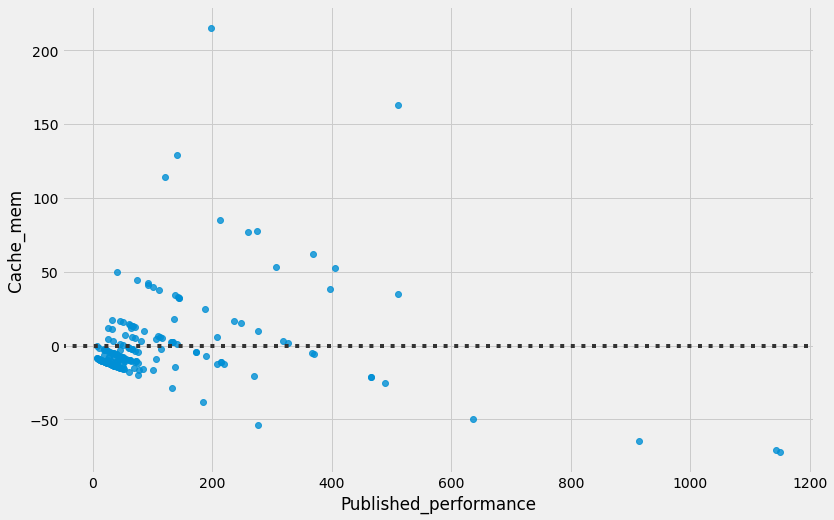

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(input['Published_performance'], input['Cache_mem'])

#### Published_performance Vs Min_channels

Plotting these two attributes since they have high correlation of 0.608903

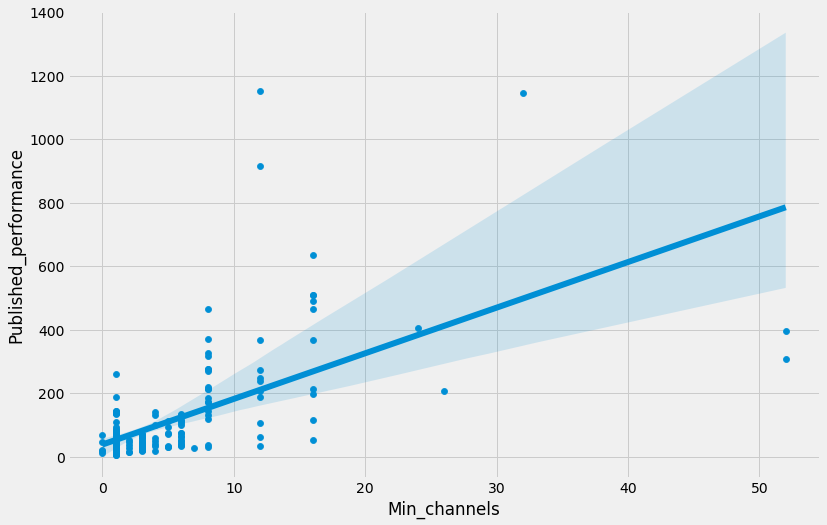

In [ ]:
# Plotting Published performance (target) with Minimum channels (predictor)
customized_scatterplot(input['Published_performance'], input['Min_channels'])

Plotting a residual plot for the same features

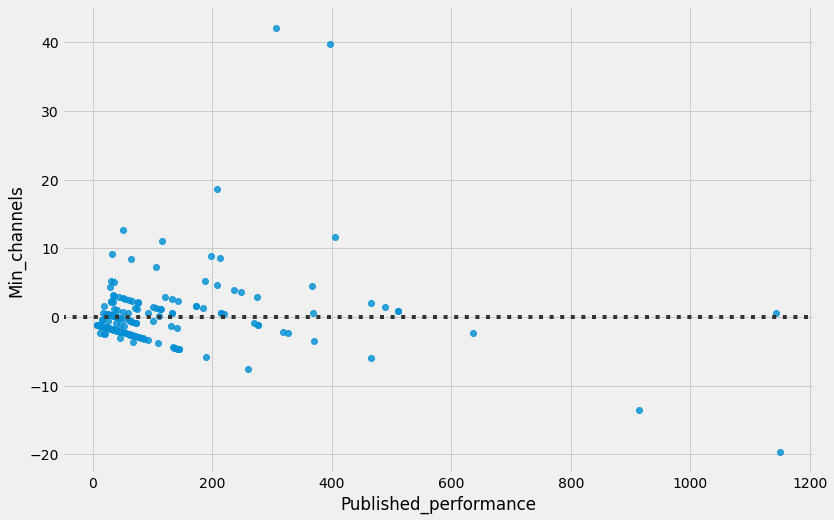

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(input['Published_performance'], input['Min_channels'])

#### Published_performance Vs Max_channels

Plotting these two attributes since they have a high correlation of 0.605209

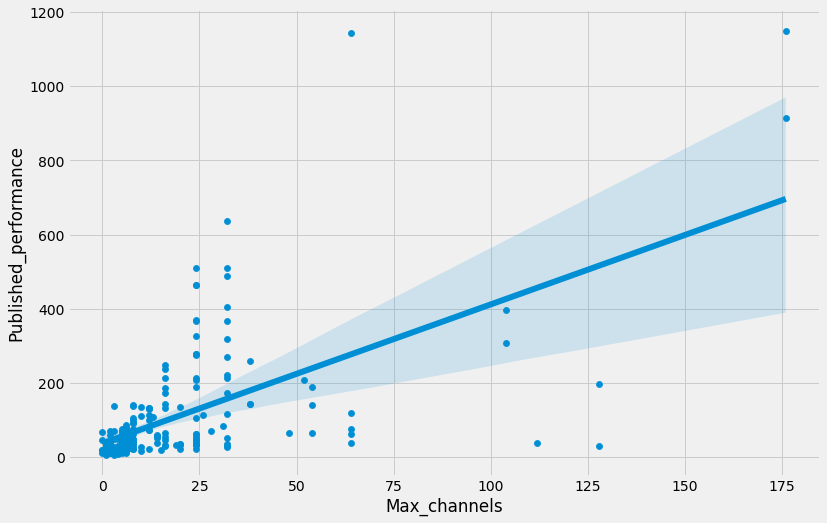

In [ ]:
# Plotting Published performance (target) with Maximum channels (predictor)
customized_scatterplot(input['Published_performance'], input['Max_channels'])

Plotting a residual plot for the same features

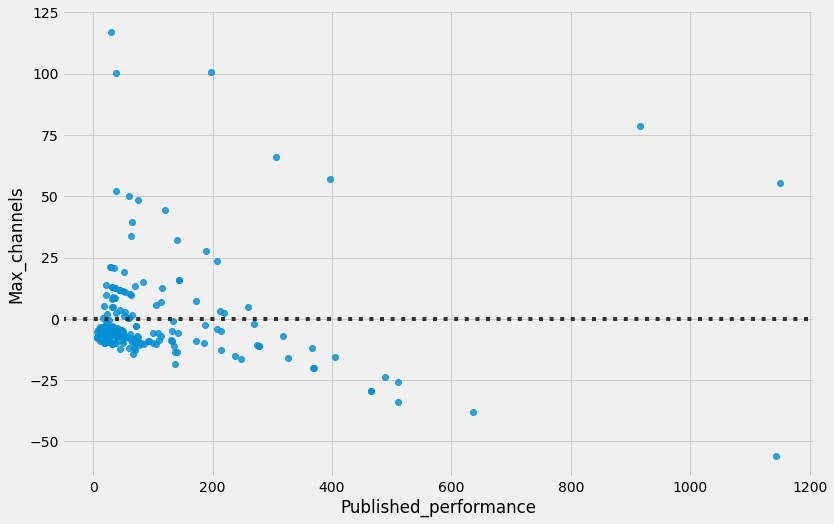

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(input['Published_performance'], input['Max_channels'])

#### Published_performance Vs Machine_cycle_time

Finally we plot these two attributes, they have a correlation of -0.307099

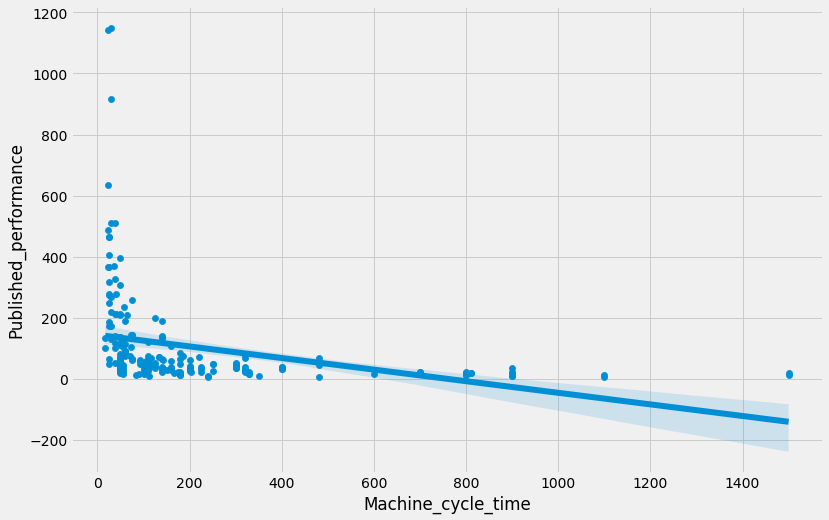

In [ ]:
# Plotting Published performance (target) with Machine cycle time (predictor)
customized_scatterplot(input['Published_performance'], input['Machine_cycle_time'])

Plotting a residual plot for the same features

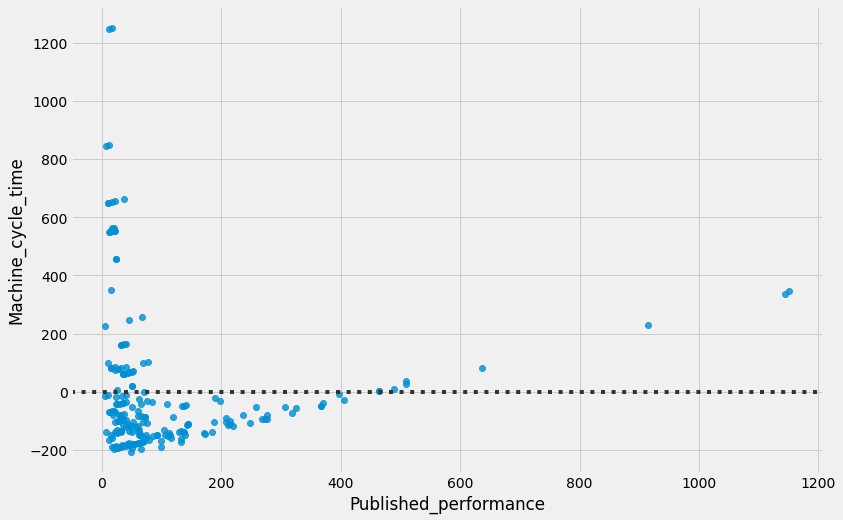

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(input['Published_performance'], input['Machine_cycle_time'])

### Boxplot analysis of Predictor variables.

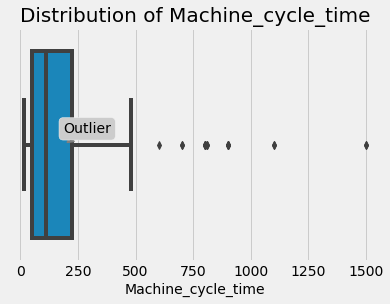

In [ ]:
# Plotting  box plot of the six independent variables.

# Custom function to plot the box plot of a input feature
def box_plotter(df,x_ax):
  # box plot of the variable height
  ax1 = sns.boxplot(df)

  # notation indicating an outlier
  ax1.annotate('Outlier', xy=(190,0), xytext=(186,-0.05), fontsize=14,
              arrowprops=dict(arrowstyle='->', ec='grey', lw=2), bbox = dict(boxstyle="round", fc="0.8"))

  # xtick, label, and title
  plt.xticks(fontsize=14)
  plt.xlabel(x_ax, fontsize=14)
  plt.title('Distribution of ' + x_ax, fontsize=20)

box_plotter(data_df.Machine_cycle_time,'Machine_cycle_time')

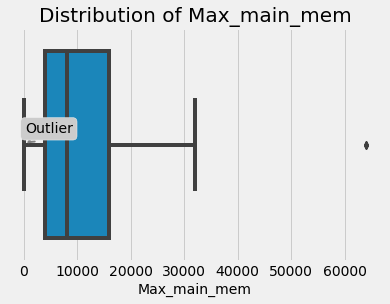

In [ ]:
box_plotter(data_df.Max_main_mem,'Max_main_mem')

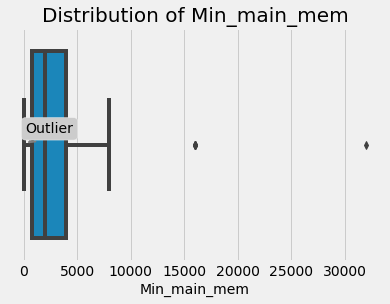

In [ ]:
box_plotter(data_df.Min_main_mem,'Min_main_mem')

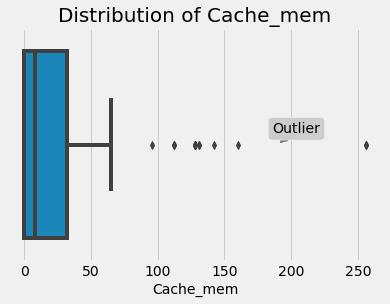

In [ ]:
box_plotter(data_df.Cache_mem,'Cache_mem')

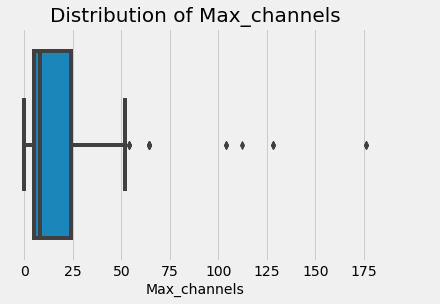

In [ ]:
box_plotter(data_df.Max_channels,'Max_channels')

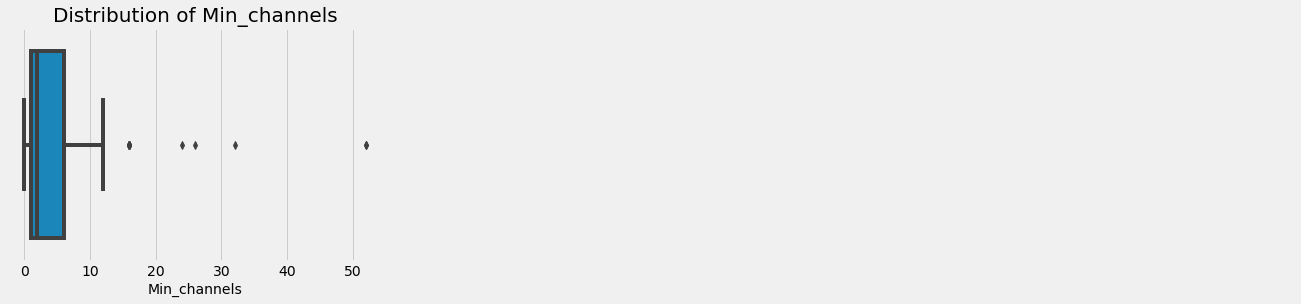

In [ ]:
box_plotter(data_df.Min_channels,'Min_channels')

### Observations of Exploratory data analysis (EDA)

Though our EDA might indicate possible presence of outliers, there are two reasons why we have concluded that there are no univariate outliers. 

*  Firstly even though the plots suggest possible outliers, analysis of the data clearly indicates that when one factor such as mmin is increased it would lead to increase in performance but variation in other factor such as increase in machine cyle time reduces the performance, in a way balancing the earlier and the effects make logical sense. Furthermore manufacturers would not spend time and money to create a cpu with specification that are irrelevent, illogical or widely abnormal.

*  Secondly the data set has deliberately selected 209 entries that represent a wide range of specification and if we deleted records solely based on out EDA, we would be limiting the prediction preformance of our regression model.


Hence we are not removing these outliers.

## 2. Data Pre processing and cleaning

### Skewness Handling

We are aware that our data doesn't follow Normal distribution. In order to fix the skewness we have implemented Box Cox Transformation.

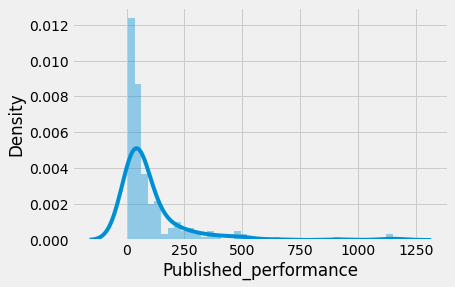

In [ ]:
# Function that takes a dataframe as input and a dataframe which has skewness fixed.
def fix_skewness(df):
    ## Getting all the data that are not of "object" type. 
    numeric_features = df.dtypes[df.dtypes != "object"].index

    # Check the skew of all numerical features
    skewed_features = df[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
    high_skew = skewed_features[abs(skewed_features) > 0.5]
    skewed_features = high_skew.index

    for feat in skewed_features:
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))

# Plotting data before skewness fix
sns.distplot(input['Published_performance']);

input_final = input[:]
fix_skewness(input_final)

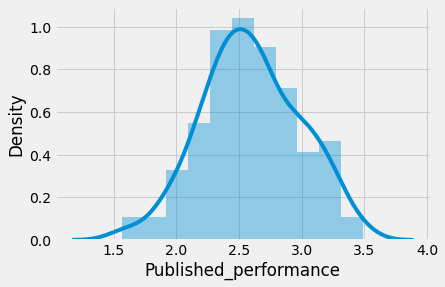

In [ ]:
# Plot after normalization
sns.distplot(input_final['Published_performance']);

In [ ]:
input.head()

,Machine_cycle_time,Min_main_mem,Max_main_mem,Cache_mem,Min_channels,Max_channels,Published_performance
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [ ]:
input_final.head()

,Machine_cycle_time,Min_main_mem,Max_main_mem,Cache_mem,Min_channels,Max_channels,Published_performance
0,3.096660,5.324820,18.975134,9.063398,1.885855,4.390185,3.061798
1,2.465916,8.408899,26.757597,4.725301,1.593651,3.248801,3.149073
2,2.465916,8.408899,26.757597,4.725301,1.593651,3.248801,3.092484
3,2.465916,8.408899,26.757597,4.725301,1.593651,3.248801,3.019654
4,2.465916,8.408899,23.279251,4.725301,1.593651,2.669070,2.936747


## 3. Model Building

### Input Dataframe creation

In [ ]:
#Creating 2 dataframes - x_df with 6 predictive attributes, y_df with goal attribute
# Dataframes (x_df, y_df) correspond to cleaned, unskewed data
x_df = input_final[['Machine_cycle_time', 'Min_main_mem', 'Max_main_mem', 'Cache_mem', 'Min_channels', 'Max_channels']]
y_df = input_final['Published_performance']


#Creating 2 dataframes - x_df with 6 predictive attributes, y_df with goal attribute
# Dataframes (x_df_initial, y_df_initial) correspond to initial data
x_df_initial = input[['Machine_cycle_time', 'Min_main_mem', 'Max_main_mem', 'Cache_mem', 'Min_channels', 'Max_channels']]
y_df_initial = input['Published_performance']

### Mathematical Equation

#### The mathematical equation for our Multiple Linear Regression model will look like,

## $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5 + \beta_6 x_6 + \epsilon \\ $$

## $$ Estimated\_Performance = \beta_0 + \beta_1 (Max\_main\_mem) + \beta_2 (Min\_main\_mem) + \beta_3 (Cache\_mem) + \beta_4 (Max\_channels) + \beta_5 (Min\_channels) + \beta_6 (Machine\_cycle\_time) + \epsilon \\ $$

This equation gives us a line that fits the data and performs better that average line.

where,
$$ \beta_0 \\ $$ is intercept, 
$$ \beta_1, .. \beta_6 \\ $$ are all coefficients,
$$ \epsilon \\ $$ is error or residual. 

### case 1 : Train = 80% Test = 20%

In [ ]:
# Splitting the training and testing data from cleaned data
x_train_set_1, x_test_set_1,y_train_set_1,y_test_set_1 = train_test_split(x_df,y_df, train_size=0.8)
print("Set 1 : ",x_train_set_1.shape, x_test_set_1.shape, y_train_set_1.shape, y_test_set_1.shape)

# Using uncleaned and skewed data
x_train_set_3, x_test_set_3,y_train_set_3,y_test_set_3 = train_test_split(x_df_initial,y_df_initial, train_size=0.8)
print("Set 3 : ",x_train_set_3.shape, x_test_set_3.shape, y_train_set_3.shape, y_test_set_3.shape)

Set 1 :  (167, 6) (42, 6) (167,) (42,)
Set 3 :  (167, 6) (42, 6) (167,) (42,)


#### **Model for 80-20 Train - Test split with uncleaned, skewed data**

In [ ]:
model_set_3 = linear_model.LinearRegression()
model_set_3.fit(x_train_set_3, y_train_set_3)
predictions_set_3 = model_set_3.predict(x_test_set_3)

#Calculating Mean Squared Error for Performance Evaluation
mean_square_error = mean_squared_error(y_test_set_3, predictions_set_3)
#Calculating Mean Absolute Error for Performance Evaluation
mean_abs_error = mean_absolute_error(y_test_set_3, predictions_set_3)
#Calculating Root Mean Squared Error for Performance Evaluation
root_mean_square_error = sqrt(mean_squared_error(y_test_set_3, predictions_set_3)) 


print(f'Mean Squared Error: {mean_square_error}')
print(f'Mean Absolute Error : {mean_abs_error}')
print(f'Root Mean Squared Error {root_mean_square_error}')

Mean Squared Error: 3378.00354628173
Mean Absolute Error : 42.49273972577873
Root Mean Squared Error 58.12059485485098


#### **Model for 80-20 Train - Test split with cleaned data**

In [ ]:
model_set_1 = linear_model.LinearRegression()
model_set_1.fit(x_train_set_1, y_train_set_1)
predictions_set_1 = model_set_1.predict(x_test_set_1)

#Calculating Mean Squared Error for Performance Evaluation
mean_square_error_1 = mean_squared_error(y_test_set_1, predictions_set_1)
#Calculating Mean Absolute Error for Performance Evaluation
mean_abs_error_1 = mean_absolute_error(y_test_set_1, predictions_set_1)
#Calculating Root Mean Squared Error for Performance Evaluation
root_mean_square_error_1 = sqrt(mean_squared_error(y_test_set_1, predictions_set_1)) 


print(f'Mean Squared Error: {mean_square_error_1}')
print(f'Mean Absolute Error : {mean_abs_error_1}')
print(f'Root Mean Squared Error {root_mean_square_error_1}')

Mean Squared Error: 0.020903303549812506
Mean Absolute Error : 0.09951227815992308
Root Mean Squared Error 0.14457974806248802


We can observe that with the normalized data there is a reduction in MSE.

Text(0.5, 0.98, 'Final Model - PRP Vs ERP with cleaned')

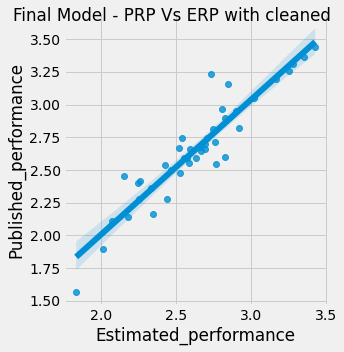

In [ ]:
# Plotting the predictions of model trained with cleaned data
df_linear_set_1 = pd.DataFrame({'Published_performance':list(y_test_set_1),'Estimated_performance':predictions_set_1})
sns.lmplot(x='Estimated_performance', y='Published_performance', data=df_linear_set_1).fig.suptitle("Final Model - PRP Vs ERP with cleaned")

Text(0.5, 0.98, 'Inital Model - PRP Vs ERP with Uncleaned')

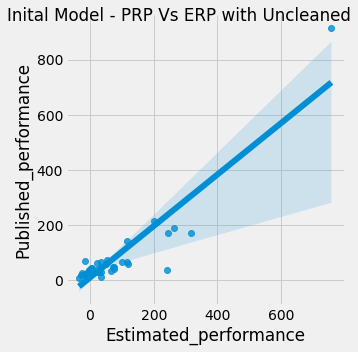

In [ ]:
# Plotting the predictions of model trained with uncleaned, skewed data
df_linear_set_3 = pd.DataFrame({'Published_performance':list(y_test_set_3),'Estimated_performance':predictions_set_3})
sns.lmplot(x='Estimated_performance', y='Published_performance', data=df_linear_set_3).fig.suptitle("Inital Model - PRP Vs ERP with Uncleaned")

From the above two plots we can say that balancing the skewness has resulted in overall better fit, It can be observed that the error values have reduced, which indicates that Final model is a better fit

### case 2 : Train = 10% Test = 90%

In [ ]:
# Plotting the predictions of model trained with 10 % data.
x_train_set_2, x_test_set_2, y_train_set_2, y_test_set_2 = train_test_split(x_df,y_df, train_size=0.1)
print("Set 2 : ",x_train_set_2.shape, x_train_set_1.shape, y_train_set_2.shape, y_train_set_1.shape)

Set 2 :  (20, 6) (167, 6) (20,) (167,)


#### **Model for 10-90 Train test split with uncleaned, skewed data**

In [ ]:
model_set_2 = linear_model.LinearRegression()
model_set_2.fit(x_train_set_2,y_train_set_2)
predictions_set_2 = model_set_2.predict(x_test_set_2)

#Calculating Mean Squared Error for Performance Evaluation
mean_square_error_2 = mean_squared_error(y_test_set_2, predictions_set_2)
#Calculating Mean Absolute Error for Performance Evaluation
mean_abs_error_2 = mean_absolute_error(y_test_set_2, predictions_set_2)
#Calculating Root Mean Squared Error for Performance Evaluation
root_mean_square_error_2 = sqrt(mean_squared_error(y_test_set_2, predictions_set_2)) 

print(f'Mean Squared Error: {mean_square_error_2}')
print(f'Mean Absolute Error : {mean_abs_error_2}')
print(f'Root Mean Squared Error {root_mean_square_error_2}')

Mean Squared Error: 0.04817330095342986
Mean Absolute Error : 0.16754245805875487
Root Mean Squared Error 0.2194841701659367


Text(0.5, 0.98, 'Model - PRP Vs ERP with 10 % Training data')

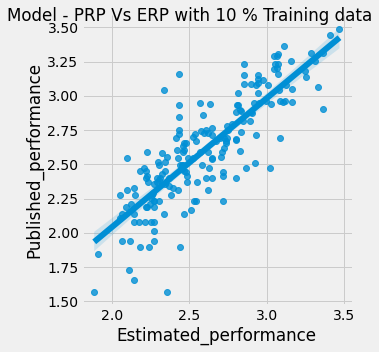

In [ ]:

df_linear_set_2 = pd.DataFrame({'Published_performance':list(y_test_set_2), 'Estimated_performance':predictions_set_2})
sns.lmplot(x='Estimated_performance', y='Published_performance', data=df_linear_set_2).fig.suptitle("Model - PRP Vs ERP with 10 % Training data")

###**Justification on Split of datasets into training and test sets.**

Case 1:

  Here we are dealing with the right model fitting, as we are taking 80-20 split for train-test data. We are able to achieve better fit that average fit.

Case 2:

 From the above cases we can see that when we take a train set of 10% it leads to high error. This is a case of underfitting, which can be seen from the plots

###  **K-Fold Cross Validation**

####80:20 - Train:Test split

In [ ]:
# KFold cross validation with neg_mean_squared_error scoring for 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
cv_scores = cross_val_score(model_set_1, x_train_set_1, y_train_set_1, scoring='neg_mean_squared_error', cv=folds)
print(f'Kfold scores \n {cv_scores}')

Kfold scores 
 [-0.02227969 -0.04698126 -0.04293735 -0.02194768 -0.024416  ]
LinearRegression()


#### 10:90 - Train:Test split

In [ ]:
# KFold cross validation with neg_mean_squared_error scoring
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
cv_scores = cross_val_score(model_set_2, x_train_set_2, y_train_set_2, scoring='neg_mean_squared_error', cv=folds)
print(f'Kfold scores \n {cv_scores}')

Kfold scores 
 [-0.02657053 -0.02066866 -0.07554855 -0.07273748 -0.00678239]


##4. Performance Evaluation

Baseline model building with average fit.

Baseline mean target value :  2.5791919579269007
----------------------------------------------------------------
Baseline Mean Squared Error: 0.1545307514897547
Baseline Mean Absolute Error : 0.3178964437852074
Baseline Root Mean Squared Error 0.3931039957692553
----------------------------------------------------------------
Mean Squared Error of the final model: 0.020903303549812506
Mean Absolute Error of the final model: 0.09951227815992308
Root Mean Squared Error of the final model: 0.14457974806248802
----------------------------------------------------------------


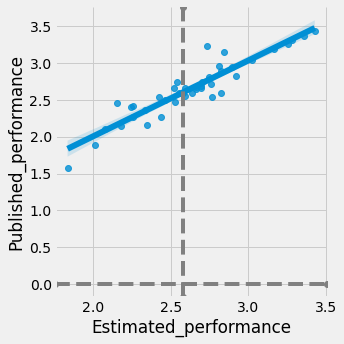

In [ ]:
# Calculating mean target value from training dataset
mean_target = y_train_set_1.mean()

print("Baseline mean target value : ", mean_target)
mean_target_list = [mean_target for i in range (0,y_test_set_2.count())]
mean_target_set = pd.Series(mean_target_list)

#Calculating Baseline Mean Squared Error for Performance Evaluation
mean_square_error_base = mean_squared_error(y_test_set_2, mean_target_set)
#Calculating Baseline Mean Absolute Error for Performance Evaluation
mean_abs_error_base = mean_absolute_error(y_test_set_2, mean_target_set)
#Calculating Baseline Root Mean Squared Error for Performance Evaluation
root_mean_square_error_base = sqrt(mean_squared_error(y_test_set_2, mean_target_set)) 

print("----------------------------------------------------------------")
print(f'Baseline Mean Squared Error : {mean_square_error_base}')
print(f'Baseline Mean Absolute Error : {mean_abs_error_base}')
print(f'Baseline Root Mean Squared Error : {root_mean_square_error_base}')
print("----------------------------------------------------------------")
print(f'Mean Squared Error of the final model : {mean_square_error_1}')
print(f'Mean Absolute Error of the final model : {mean_abs_error_1}')
print(f'Root Mean Squared Error of the final model : {root_mean_square_error_1}')
print("----------------------------------------------------------------")

# Plotting the predictions of model trained with cleaned data
df_linear_set_1 = pd.DataFrame({'Published_performance':list(y_test_set_1),'Estimated_performance':predictions_set_1})
ax = sns.lmplot(x='Estimated_performance', y='Published_performance', data=df_linear_set_1)
ax.refline(x=mean_target,y=0)

The above plot compares the fit of final model vs average fit.

####Peformance Evaluation - Conclusion


*  By comparing our RMSE values with baseline RMSE values, we can clearly observe that the final model produces considerably lower RMSE (approximately 50%), which is desired. Hence it can be concluded that our model is a better fit.
*   The influence of the six predictor variable on the dependent target variable didnot lead to overfit or underfit, as we chose 80-20 train - test split. Whereas if we choose training data of less than 50%, we were able to observe underfit.



